Title: Supervised Learning 

Task 1: Identify input-output pairs in a dataset of housing prices.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Step 1: Load the California housing dataset
california_housing = fetch_california_housing()

# Step 2: Create a DataFrame from the dataset
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['Price'] = california_housing.target  # Adding the target (Price) to the DataFrame

# Step 3: Identify the input (features) and output (target)
X = df.drop('Price', axis=1)  # Input features (excluding the Price)
y = df['Price']  # Output (target) - Housing prices

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Display the first few input-output pairs
input_output_pairs = pd.concat([X_train, y_train], axis=1)
print(input_output_pairs.head())  # Show the first few rows of input-output pairs


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  Price  
14196    -117.03  1.030  
8267     -118.16  3.821  
17445    -120.48  1.726  
14265    -117.11  0.934  
2271     -119.80  0.965  


Task 2: Match labeled images to their correct classifications.

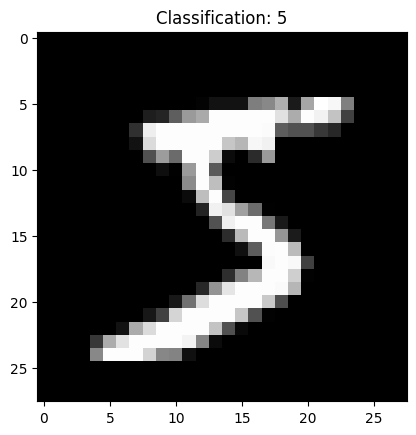

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

# Step 1: Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)

# Step 2: Get the image data and labels
X = mnist.data  # Image data (28x28 pixels flattened to 1D array)
y = mnist.target.astype(int)  # Labels (0-9)

# Step 3: Display an image from the dataset
index = 0  # Index of the image to display (change to display different images)
image_data = X.iloc[index].values.reshape(28, 28)  # Reshape the image data into 28x28

# Step 4: Show the image and match it to the classification label
plt.imshow(image_data, cmap='gray')
plt.title(f"Classification: {y[index]}")
plt.show()


Task 3: List potential inputs and outputs for predicting stock prices.

Input Features: 
   Open Price  Close Price  High Price  Low Price  Volume  \
0   49.659464     9.971458   36.474425  55.692766    6226   
1   42.391160     2.449355   60.960293  82.549423    5646   
2    8.041405    65.652206   52.706150  94.542880    8304   
3   39.066535    96.250903   52.101528   5.015381    5982   
4   74.363791    63.938878   85.928408  17.629640    4286   

   50-Day Moving Average  200-Day Moving Average        RSI      MACD  \
0              70.374846               69.689326  42.701374  0.705978   
1              33.625088               35.730877  37.583003  0.982693   
2              35.330486               85.280832  63.573379  0.259840   
3              71.320539               20.817610  35.631873  0.126764   
4              65.495280                2.330952  10.207823  0.108430   

   Bollinger Bands Upper  Bollinger Bands Lower  Interest Rates  \
0              69.625253              64.370849        1.911102   
1              80.352287              73.41

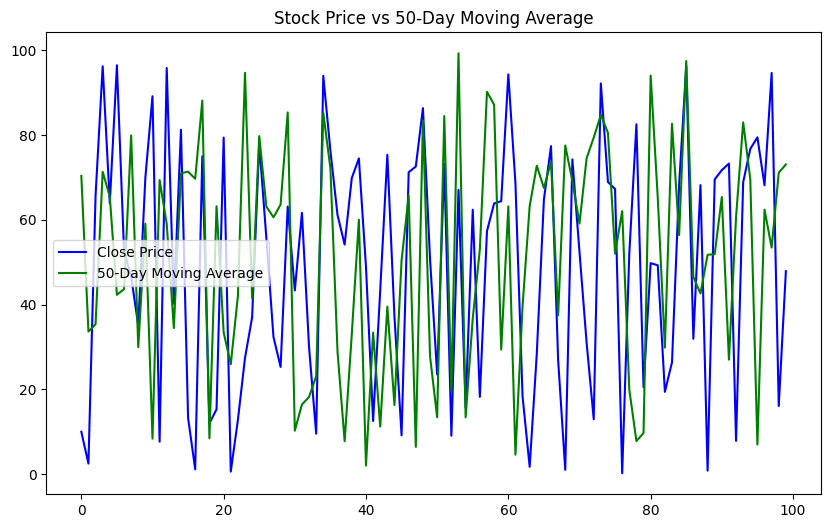

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Example of inputs (features) for stock price prediction
# Inputs can be grouped into categories such as historical stock data, technical indicators, and macroeconomic data

def generate_features():
    # Historical stock data
    historical_data = {
        'Open Price': np.random.rand(100) * 100,  # Random data for illustration
        'Close Price': np.random.rand(100) * 100, 
        'High Price': np.random.rand(100) * 100, 
        'Low Price': np.random.rand(100) * 100, 
        'Volume': np.random.randint(1000, 10000, 100)
    }

    # Technical Indicators
    technical_indicators = {
        '50-Day Moving Average': np.random.rand(100) * 100, 
        '200-Day Moving Average': np.random.rand(100) * 100,
        'RSI': np.random.rand(100) * 100,  # Random RSI values between 0-100
        'MACD': np.random.rand(100),       # Random MACD values
        'Bollinger Bands Upper': np.random.rand(100) * 100,
        'Bollinger Bands Lower': np.random.rand(100) * 100
    }

    # Macroeconomic Data
    macroeconomic_data = {
        'Interest Rates': np.random.rand(100) * 10,  # Random interest rates between 0-10%
        'Inflation Rate': np.random.rand(100) * 5,    # Random inflation rates between 0-5%
        'GDP Growth': np.random.rand(100) * 5         # Random GDP growth rates
    }

    # Combine all data into one dataframe
    df = pd.DataFrame({**historical_data, **technical_indicators, **macroeconomic_data})
    return df

# Example of outputs (targets) for stock price prediction
def generate_targets():
    # The target can be the next day's close price or a binary classification (price up or down)
    target = {
        'Next Day Close Price': np.random.rand(100) * 100,  # Random next day's close price
        'Price Direction': np.random.choice([0, 1], 100)   # 0 = Down, 1 = Up (binary classification)
    }
    target_df = pd.DataFrame(target)
    return target_df

# Generate feature and target data
features = generate_features()
targets = generate_targets()

# Preview the feature and target data
print("Input Features: ")
print(features.head())

print("\nOutput Targets: ")
print(targets.head())

# Example: Feature Scaling (Normalizing)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Show the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled Features: ")
print(scaled_df.head())

# Visualization: Plot the features
plt.figure(figsize=(10, 6))
plt.plot(features['Close Price'], label='Close Price', color='b')
plt.plot(features['50-Day Moving Average'], label='50-Day Moving Average', color='g')
plt.legend()
plt.title("Stock Price vs 50-Day Moving Average")
plt.show()

